In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from umap import UMAP

# from .autonotebook import tqdm as notebook_tqdm

import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import pandas as pd
import random
random.seed(42)

from time import time

## 次元削減手法について
* ブレインパッド, 2022高次元データの可視化を目的とした次元削減手法を紹介 https://www.brainpad.co.jp/doors/contents/01_tech_2022-03-09-160000/
* 

In [58]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

In [59]:
# digits.keys()
# digits.feature_names

In [4]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

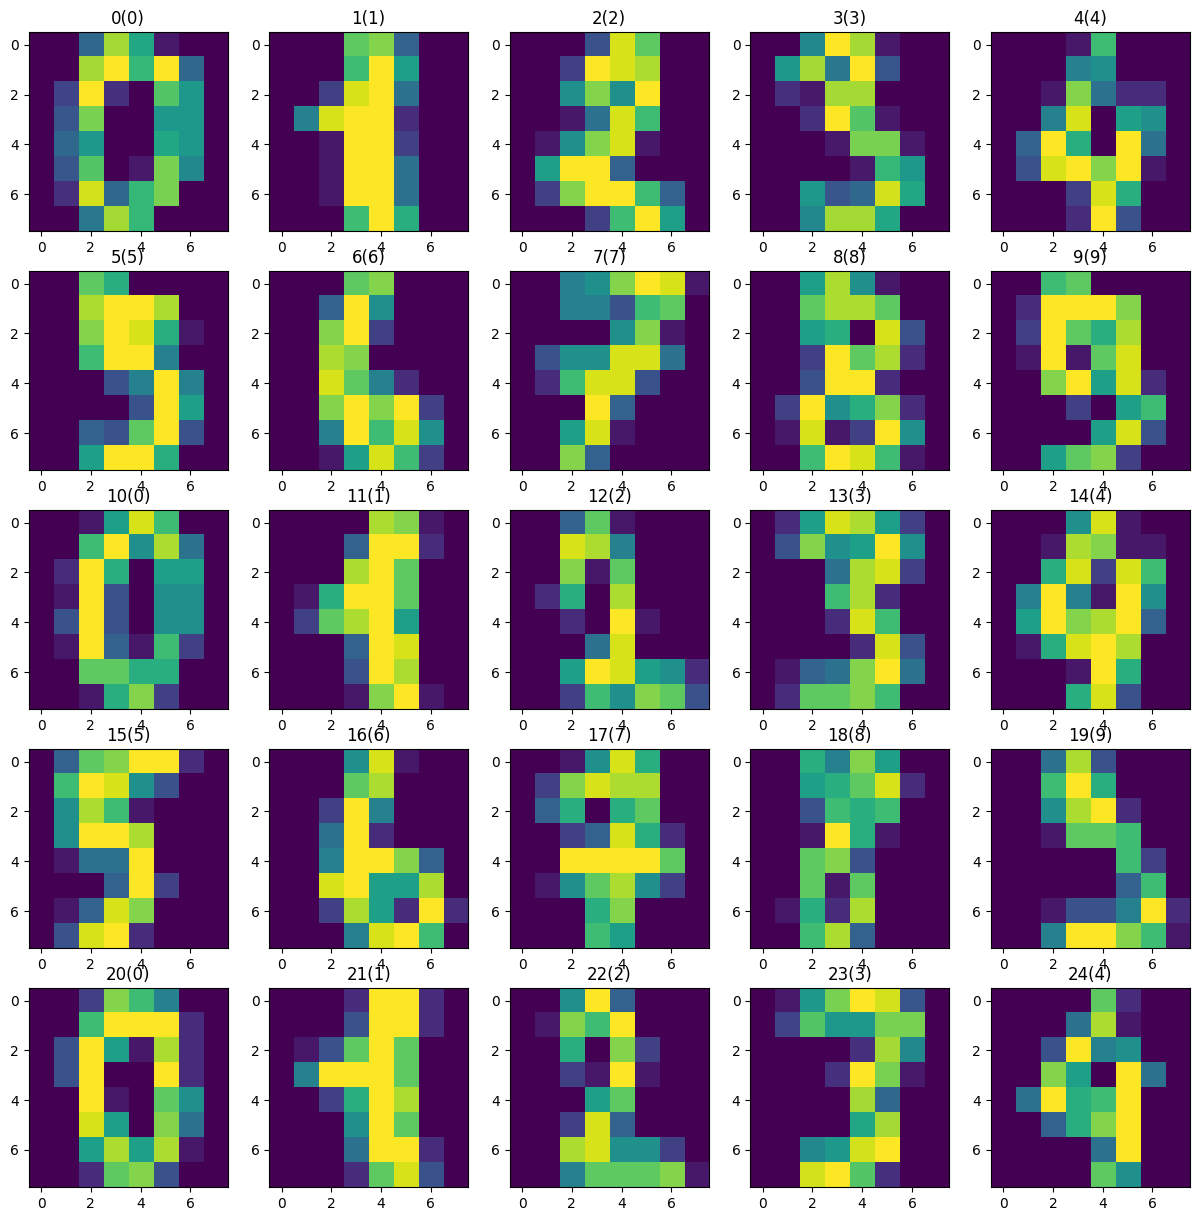

In [60]:
# indexes = random.sample(list(range(data.shape[0])),25)
indexes = list(range(25))

fig,axes = plt.subplots(5,5,figsize=(15,15))
axes = axes.flatten()
for i,idx in enumerate(indexes):
    
    axes[i].imshow(X[idx].reshape((8,8)))
    target = y[idx]
    axes[i].set_title(f"{idx}({target})")


In [7]:
# data_df = pd.DataFrame(data,columns = digits.feature_names)
# print(data_df.columns)

### Data
* 10 class
* classification : 0,1,2,3,4,5,6,7,8,9

In [8]:
# plt.hist(data[:,1])
# sns.countplot(x = "a", data = pd.Series(data[:,1]))

In [61]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [62]:

pca = PCA(n_components=2,random_state=0)
tsne = TSNE(n_components=2,random_state=0)
umap = UMAP(n_components=2,random_state=0)

In [63]:
t0 = time()
X_reduced_pca = pca.fit_transform(X)
t1 = time()
X_reduced_tsne = tsne.fit_transform(X)
t2 = time()
X_reduced_umap = umap.fit_transform(X)
t3 = time()
print("PCA : ", t1-t0, "[sec]")
print("T-SNE : ", t2-t1, "[sec]")
print("UMAP : ", t3-t2, "[sec]")

PCA :  0.0029249191284179688 [sec]
T-SNE :  2.097041130065918 [sec]
UMAP :  4.07253885269165 [sec]


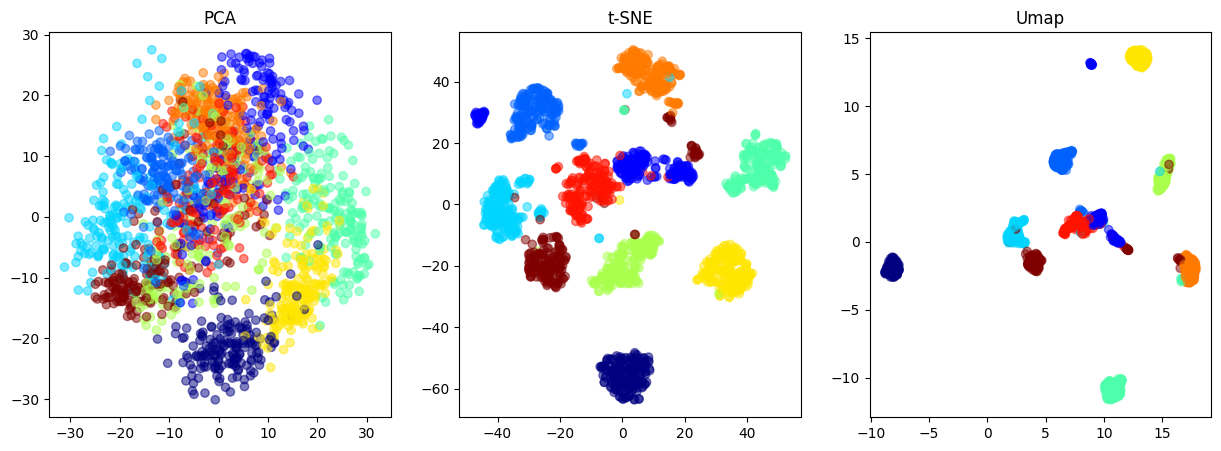

In [64]:
fig,axes = plt.subplots(1,3,figsize=(15,5))

for i,(X,model_name) in enumerate(zip(
    [X_reduced_pca,X_reduced_tsne,X_reduced_umap],
    ["PCA","t-SNE","Umap"]
)):
    axes[i].scatter(
        X[:,0],X[:,1],c= labels,cmap="jet",alpha=0.5
    )
    axes[i].set_title(model_name)
    

## 精度評価

In [65]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [66]:
kmeans = KMeans(
    n_clusters = 10,
    init = 'k-means++',
    random_state = 0
)

In [67]:
def purity_score(y_true,y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(
        y_true,y_pred
    )
    purity = np.sum(np.amax(contingency_matrix),axis=0) / np.sum(contingency_matrix)
    return contingency_matrix,purity
    

In [68]:

preds_pca = kmeans.fit_predict(X_reduced_pca)
preds_tsne = kmeans.fit_predict(X_reduced_tsne)
preds_umap = kmeans.fit_predict(X_reduced_umap)

In [69]:
matrix0,score0 = purity_score(y,preds_pca)
matrix1,score1 = purity_score(y,preds_tsne)
matrix2,score2 = purity_score(y,preds_umap)

In [70]:
print(score0,score1,score2)

0.07679465776293823 0.1001669449081803 0.1001669449081803


In [71]:
matrix2

array([[  0,   0,   0,   0, 178,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  27,  57,   0,  98,   0],
       [166,   0,   0,   0,   0,   0,   0,   1,  10,   0],
       [  0,   0,   1,   0,   0,   0,   0,   2,   1, 179],
       [  0,   0,   0, 176,   0,   0,   0,   4,   1,   0],
       [  0,   2, 179,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 180,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0, 170,   2],
       [  0, 145,   2,   0,   0,   0,  20,  12,   0,   1]])

In [73]:
preds_pca[0]

np.int32(9)